In [314]:
#Generic
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, joblib
from scipy.stats import zscore,boxcox

#Encode
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Skewness
from sklearn.preprocessing import PowerTransformer

#Normalize
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Impute
from sklearn.impute import SimpleImputer

#Decomposition
from sklearn.decomposition import PCA

#Train Test Split
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix,f1_score

#CrossVal
from sklearn.model_selection import cross_val_score

#RegressionModels
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Optimization
from sklearn.model_selection import GridSearchCV

#Deeplearning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

#Imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [315]:
#Import Data
df=pd.read_excel('covid19_clinical_dataset.xlsx')

In [316]:
#Check head
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [317]:
#Check columns which have null values > 50%
sum(((df.isna().sum()/5644)*100)>50)

105

In [318]:
#Check column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [319]:
#Remove columns which have null values greater than 50%
n=0
for x in df.columns:
    if ((df.isna().sum()/df.count().max())*100)[x] > 50:
        df=df.drop(x,axis=1)
        n+=1
print(n)

105


In [321]:
#We have selected only 5 features and a target and deleted all other columns
#as it had excess of null rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 6 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Patient ID                                             5644 non-null   object
 1   Patient age quantile                                   5644 non-null   int64 
 2   SARS-Cov-2 exam result                                 5644 non-null   object
 3   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64 
 4   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64 
 5   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 264.7+ KB


In [322]:
#Check unique values in Patient ID column
df['Patient ID'].nunique()
#As we can see all the values are distinct so we will drop the column
#as it will not help us train the model
#also looking at the Patient ID column there is nothing that we can extract to train the model

5644

In [323]:
#Drop the column Patient ID
df=df.drop('Patient ID',axis=1)

In [325]:
#Check value counts of target
df['SARS-Cov-2 exam result'].value_counts()
#As we can see the data is highly skewed

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [89]:
#Encode target column with LabelEncoder since it has only two values
le=LabelEncoder()

In [332]:
#Encode column
df['SARS-Cov-2 exam result']=le.fit_transform(df['SARS-Cov-2 exam result'])

In [333]:
#Instantiate MinMaxScaler 
scale=MinMaxScaler()

In [334]:
#Instantiate PowerTransformer 
pt=PowerTransformer()

In [335]:
#Apply PowerTransformation
for x in df.columns.drop('SARS-Cov-2 exam result'):
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=pt.fit_transform(df.loc[:,x].values.reshape(-1,1))

In [336]:
#Create X for features and y for target
X=df.drop('SARS-Cov-2 exam result',axis=1)
y=df['SARS-Cov-2 exam result']

In [337]:
#Scale features
X=scale.fit_transform(X)

In [338]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=x)
        md=model
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
#         acc=accuracy_score(y_test,predict)
        f1=f1_score(y_test,predict)
#         avg=(confusion_matrix(y_test,predict)[0,0]+confusion_matrix(y_test,predict)[1,1])/(confusion_matrix(y_test,predict)[0,1]+confusion_matrix(y_test,predict)[1,0])
        if f1>max_score:
            max_score=f1
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [339]:
#Call the function
model_select(LogisticRegression(max_iter=2000))

Max score is 0.10144927536231885 with random state 66


In [340]:
#Call the function
model_select(KNeighborsClassifier())

Max score is 0.19076923076923075 with random state 84


In [341]:
#Call the function
model_select(SVC())

Max score is 0.1643835616438356 with random state 54


In [342]:
#Call the function
model_select(DecisionTreeClassifier())

Max score is 0.13986013986013984 with random state 54


In [343]:
#Call the function
model_select(RandomForestClassifier())

Max score is 0.13986013986013984 with random state 54


In [344]:
#Call the function
model_select(AdaBoostClassifier())

Max score is 0.14457831325301207 with random state 55


In [346]:
#As seen from the above results none of the model is giving is high F1 score as the target varaible is highly skewed
#But these models might give us high accuracy since data is leaned on on value
#Since F1 score is calculated from precision and recall it will be a better metric to analyze the models

#Therefore we will have to preprocess the data

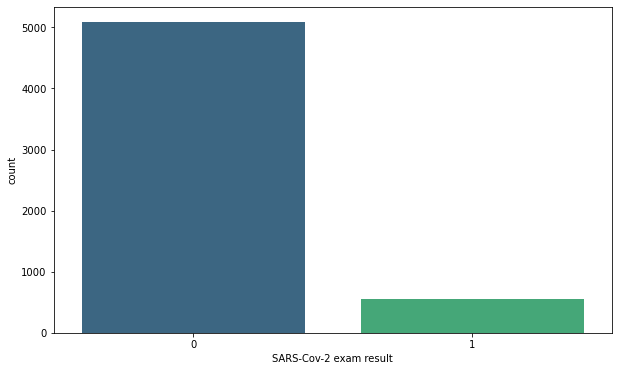

In [351]:
plt.figure(figsize=(10,6))
sns.countplot(x='SARS-Cov-2 exam result',data=df,palette='viridis')
plt.show()

In [352]:
#We will oversample the data to make count of target values quivalent
#to oversample we will use RandomOverSampler from imblearn.oversampler 

In [354]:
#Instantiate RandomOverSampler
rus=RandomOverSampler()

In [355]:
#Oversample the data
X_rus,y_rus=rus.fit_sample(X,y)

In [356]:
X_rus.shape

(10172, 4)

In [357]:
y_rus.shape

(10172,)

In [358]:
#Create dataframe of features
X_rus=pd.DataFrame(X_rus,columns=df.columns.drop('SARS-Cov-2 exam result'))

In [359]:
X_rus['Patient addmited to regular ward (1=yes, 0=no)'].value_counts()

0.0    9812
1.0     360
Name: Patient addmited to regular ward (1=yes, 0=no), dtype: int64

In [360]:
X_rus['Patient addmited to semi-intensive unit (1=yes, 0=no)'].value_counts()

0.0    10055
1.0      117
Name: Patient addmited to semi-intensive unit (1=yes, 0=no), dtype: int64

In [361]:
X_rus['Patient addmited to intensive care unit (1=yes, 0=no)'].value_counts()

0.0    10069
1.0      103
Name: Patient addmited to intensive care unit (1=yes, 0=no), dtype: int64

In [362]:
#Create dataframe of targets
y_rus=pd.DataFrame(y_rus,columns=['SARS-Cov-2 exam result'])

In [364]:
#As seen the count of target values are equal
y_rus['SARS-Cov-2 exam result'].value_counts()

1    5086
0    5086
Name: SARS-Cov-2 exam result, dtype: int64

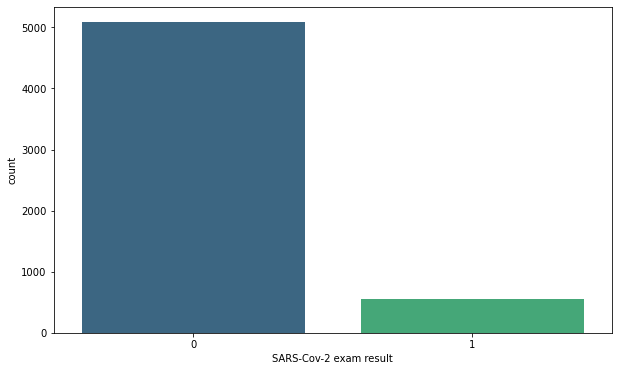

In [365]:
plt.figure(figsize=(10,6))
sns.countplot(x='SARS-Cov-2 exam result',data=df,palette='viridis')
plt.show()

In [366]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X_rus.values, y_rus.values.ravel(), test_size=0.33, random_state=x)
        md=model
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
#         acc=accuracy_score(y_test,predict)
        f1=f1_score(y_test,predict)
#         avg=(confusion_matrix(y_test,predict)[0,0]+confusion_matrix(y_test,predict)[1,1])/(confusion_matrix(y_test,predict)[0,1]+confusion_matrix(y_test,predict)[1,0])
        if f1>max_score:
            max_score=f1
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [367]:
#Call the function
model_select(LogisticRegression(max_iter=2000))

Max score is 0.5202907328891581 with random state 58


In [368]:
#Call the function
model_select(KNeighborsClassifier())

Max score is 0.6729947793070716 with random state 45


In [369]:
#Call the function
model_select(SVC())

Max score is 0.6807998072753554 with random state 49


In [370]:
#Call the function
model_select(DecisionTreeClassifier())

Max score is 0.6805143422354105 with random state 74


In [371]:
#Call the function
model_select(RandomForestClassifier())

Max score is 0.6760705289672544 with random state 80


In [372]:
#Call the function
model_select(AdaBoostClassifier())

Max score is 0.6934696723216361 with random state 49


In [373]:
#As we can see that there is significant increase in f1score
#we will try to train the model by optimizing the features

In [409]:
#Create new dataframe by concating sampled data
df_rus=pd.concat([X_rus,y_rus],axis=1)

In [410]:
#Check head
df_rus.head()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",SARS-Cov-2 exam result
0,0.684211,0.0,0.0,0.0,0
1,0.894737,0.0,0.0,0.0,0
2,0.421053,0.0,0.0,0.0,0
3,0.263158,0.0,0.0,0.0,0
4,0.789474,0.0,0.0,0.0,0


In [411]:
#Check info
df_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10172 entries, 0 to 10171
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient age quantile                                   10172 non-null  float64
 1   Patient addmited to regular ward (1=yes, 0=no)         10172 non-null  float64
 2   Patient addmited to semi-intensive unit (1=yes, 0=no)  10172 non-null  float64
 3   Patient addmited to intensive care unit (1=yes, 0=no)  10172 non-null  float64
 4   SARS-Cov-2 exam result                                 10172 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 397.5 KB


In [412]:
df_rus.head()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",SARS-Cov-2 exam result
0,0.684211,0.0,0.0,0.0,0
1,0.894737,0.0,0.0,0.0,0
2,0.421053,0.0,0.0,0.0,0
3,0.263158,0.0,0.0,0.0,0
4,0.789474,0.0,0.0,0.0,0


In [413]:
#We will drop values for rows which have 0,0,0 as regular ward,semi-intensive unit and intensive care unit
#as logicaly patient should be in one of this rooms
#There are many such rows which we will delete
drop_ind=df_rus[(df_rus['Patient addmited to regular ward (1=yes, 0=no)']==0)
      & (df_rus['Patient addmited to semi-intensive unit (1=yes, 0=no)']==0)
      &(df_rus['Patient addmited to intensive care unit (1=yes, 0=no)']==0)].index

In [414]:
#Captured index above we will drop such rows by index
df_rus=df_rus.drop(index=drop_ind)

In [415]:
#We will reset the index
df_rus=df_rus.reset_index().drop('index',axis=1)

In [416]:
#Check info again
df_rus.info()
#We have distilled rows to 580 values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient age quantile                                   580 non-null    float64
 1   Patient addmited to regular ward (1=yes, 0=no)         580 non-null    float64
 2   Patient addmited to semi-intensive unit (1=yes, 0=no)  580 non-null    float64
 3   Patient addmited to intensive care unit (1=yes, 0=no)  580 non-null    float64
 4   SARS-Cov-2 exam result                                 580 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 22.8 KB


In [418]:
#Check skewness
df_rus.skew()

Patient age quantile                                    -1.108454
Patient addmited to regular ward (1=yes, 0=no)          -0.498759
Patient addmited to semi-intensive unit (1=yes, 0=no)    1.490452
Patient addmited to intensive care unit (1=yes, 0=no)    1.691684
SARS-Cov-2 exam result                                  -1.477141
dtype: float64

In [421]:
#Apply PowerTransformation
for x in df_rus.columns.drop('SARS-Cov-2 exam result'):
    if abs(df_rus.loc[:,x].skew())>0.55:
        df_rus.loc[:,x]=pt.fit_transform(df_rus.loc[:,x].values.reshape(-1,1))

In [422]:
#Check skewness
df_rus.skew()

Patient age quantile                                    -0.363420
Patient addmited to regular ward (1=yes, 0=no)          -0.498759
Patient addmited to semi-intensive unit (1=yes, 0=no)    1.490452
Patient addmited to intensive care unit (1=yes, 0=no)    1.691684
SARS-Cov-2 exam result                                  -1.477141
dtype: float64

In [423]:
# zs=zscore(df_rus)
# df_rus=df_rus[((zs<3)).all(axis=1)]

In [424]:
#Check value counts of Target
df_rus['SARS-Cov-2 exam result'].value_counts()

1    462
0    118
Name: SARS-Cov-2 exam result, dtype: int64

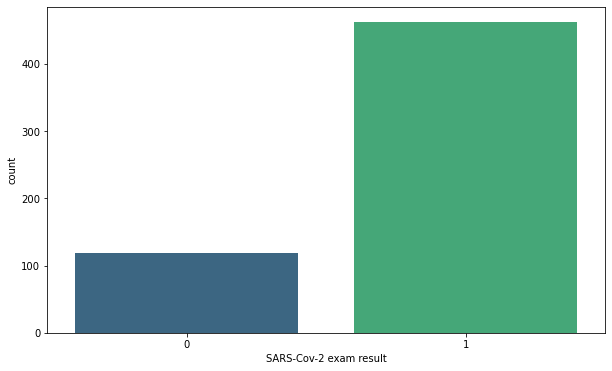

In [426]:
plt.figure(figsize=(10,6))
sns.countplot(x='SARS-Cov-2 exam result',data=df_rus,palette='viridis')
plt.show()

In [427]:
df_rus.shape

(580, 5)

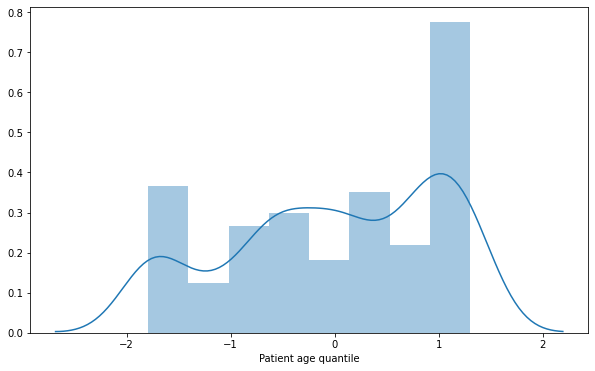

In [429]:
plt.figure(figsize=(10,6))
sns.distplot(df_rus['Patient age quantile'])
plt.show()
#Data is normalized

In [430]:
#Distinguish features and target
X_rus=df_rus.drop('SARS-Cov-2 exam result',axis=1)
y_rus=df_rus['SARS-Cov-2 exam result']

In [432]:
#traintest split
X_train, X_test, y_train, y_test = train_test_split(X_rus.values, y_rus.values.ravel(), test_size=0.33, random_state=88)

In [433]:
#create object of RandomForestClassifier
rf=RandomForestClassifier()

In [434]:
#Fit training data
rf.fit(X_train,y_train)

RandomForestClassifier()

In [435]:
#Predict
predict=rf.predict(X_test)

In [437]:
print(confusion_matrix(y_test,predict))
print()
print(classification_report(y_test,predict))
#As seen our model is performing better
#We will try to hypertune the parameters

[[ 20  18]
 [  1 153]]

              precision    recall  f1-score   support

           0       0.95      0.53      0.68        38
           1       0.89      0.99      0.94       154

    accuracy                           0.90       192
   macro avg       0.92      0.76      0.81       192
weighted avg       0.91      0.90      0.89       192



In [438]:
#Create GridSearch and param
param={'n_estimators':[100,130,150,170,190,210,230,250,290,310,330,370,410,430]}
gscv=GridSearchCV(RandomForestClassifier(),param)

In [439]:
#Fit data
gscv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 130, 150, 170, 190, 210, 230,
                                          250, 290, 310, 330, 370, 410, 430]})

In [441]:
#Find best parameters
gscv.best_params_

{'n_estimators': 130}

In [442]:
#Create object of RandomForestClassifier
rf=RandomForestClassifier(n_estimators=130)

In [443]:
#Fit training data
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=130)

In [444]:
#Predict values
predict=rf.predict(X_test)

In [446]:
print(confusion_matrix(y_test,predict))
print()
print(classification_report(y_test,predict))

[[ 20  18]
 [  1 153]]

              precision    recall  f1-score   support

           0       0.95      0.53      0.68        38
           1       0.89      0.99      0.94       154

    accuracy                           0.90       192
   macro avg       0.92      0.76      0.81       192
weighted avg       0.91      0.90      0.89       192



In [448]:
cross_val_score(RandomForestClassifier(n_estimators=130),X_train,y_train,cv=5).mean()
#Model is neither over/under fitting

0.8943389943389943

In [449]:
#Task 2

In [480]:
rus=RandomOverSampler()

In [481]:
X_rus_ml,y_rus_ml=rus.fit_sample(X,y)

In [486]:
X_rus_ml=pd.DataFrame(X_rus_ml,columns=df.columns.drop('SARS-Cov-2 exam result'))

In [487]:
y_rus_ml=pd.DataFrame(y_rus_ml,columns=['SARS-Cov-2 exam result'])

In [488]:
df_rus_ml=pd.concat([X_rus_ml,y_rus_ml],axis=1)

In [489]:
df_rus_ml.head()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",SARS-Cov-2 exam result
0,0.684211,0.0,0.0,0.0,0
1,0.894737,0.0,0.0,0.0,0
2,0.421053,0.0,0.0,0.0,0
3,0.263158,0.0,0.0,0.0,0
4,0.789474,0.0,0.0,0.0,0


In [473]:
#Create new dataframe by concating sampled data
df_rus_ml=pd.concat([X_rus,y_rus],axis=1)

In [490]:
df_rus_ml.head()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",SARS-Cov-2 exam result
0,0.684211,0.0,0.0,0.0,0
1,0.894737,0.0,0.0,0.0,0
2,0.421053,0.0,0.0,0.0,0
3,0.263158,0.0,0.0,0.0,0
4,0.789474,0.0,0.0,0.0,0


In [491]:
#We will drop values for rows which have 0,0,0 as regular ward,semi-intensive unit and intensive care unit
#as logicaly patient should be in one of this rooms
#There are many such rows which we will delete
drop_ind_ml=df_rus_ml[(df_rus_ml['Patient addmited to regular ward (1=yes, 0=no)']==0)
      & (df_rus_ml['Patient addmited to semi-intensive unit (1=yes, 0=no)']==0)
      &(df_rus_ml['Patient addmited to intensive care unit (1=yes, 0=no)']==0)].index

In [493]:
#Captured index above we will drop such rows by index
df_rus_ml=df_rus_ml.drop(index=drop_ind_ml)

In [494]:
df_rus_ml=df_rus_ml.reset_index().drop('index',axis=1)

In [496]:
X_rus_ml=df_rus_ml[['Patient age quantile','SARS-Cov-2 exam result']]
y_rus_ml=df_rus_ml.drop(['Patient age quantile','SARS-Cov-2 exam result'],axis=1)

In [497]:
rf_ml=RandomForestClassifier()

In [498]:
X_train_ml,X_test_ml,y_train_ml,y_test_ml=train_test_split(X_rus_ml,y_rus_ml,test_size=0.33,random_state=88)

In [499]:
rf_ml.fit(X_train_ml,y_train_ml)

RandomForestClassifier()

In [501]:
predict_ml=rf_ml.predict(X_test_ml)

In [505]:
# print(confusion_matrix(y_test_ml,predict_ml))
print(classification_report(y_test_ml,predict_ml))
#We will try to hypertune the parameters

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       118
           1       0.40      0.10      0.16        39
           2       1.00      0.14      0.24        36

   micro avg       0.75      0.52      0.62       193
   macro avg       0.72      0.34      0.39       193
weighted avg       0.74      0.52      0.55       193
 samples avg       0.52      0.52      0.52       193



In [507]:
joblib.dump(rf,'Brazil Covid19 RF.obj')

['Brazil Covid19 RF.obj']

In [508]:
joblib.dump(rf_ml,'Brazil Covid19 RF_ML.obj')

['Brazil Covid19 RF_ML.obj']